In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [6]:
def integral(a, t0, tf):
    return quad(a, t0, tf)[0]

# Initialize parameters

### Turns out these definitions don't work when I'm trying to manipulate things inside the Optimal_Life_Insurance() function

In [7]:
def i(t):
    # Income at time t
    return 50000*np.exp(.03*t)

def lamb(t):
    # Hazard rate
    return 1/200 + 9*t/8000

def eta(t):
    # Insurance premium-payout ratio
    return 1/200 + 9*t/8000

def sum(t):
    # integral function doesn't play nice with sums of functions
    return r+eta(t)

def H(v):
    return (lamb(v)+rho)/(1-gamma) - gamma/(1-gamma)*(r+eta(v))

def K(s):
    return lamb(s)**(1/(1-gamma))/eta(s)**(gamma/(1-gamma))+1

def a(t):
    return (np.exp(-integral(H, t, T)) + integral(lambda s: np.exp(-integral(H, t, s))*K(s), t, T))**(1-gamma)

def b(t):
    return integral(lambda s: i(s)*np.exp(-integral(sum, t, s)), t, T)

def c(t):
    return (x+b(t))/a(t)**(1/(1-gamma))

def D(t):
    return (lamb(t)/eta(t))**(1/(1-gamma)) * 1/a(t)**(1/(1-gamma))

def p(t):
    return eta(t)*((D(t)-1)*x + (lamb(t)/eta(t))**(1/(1-gamma))*b(t)/a(t)**(1/(1-gamma)))

def Initiate_Functions():
    def integral(a, t0, tf):
        return quad(a, t0, tf)[0]
    
    def i(t):
        # Income at time t
        return 50000*np.exp(.03*t)

    def lamb(t):
        # Hazard rate
        return 1/200 + 9*t/8000

    def eta(t):
        # Insurance premium-payout ratio
        return 1/200 + 9*t/8000

    def sum(t):
        # integral function doesn't play nice with sums of functions
        return r+eta(t)
    
    def H(v):
        return (lamb(v)+rho)/(1-gamma) - gamma/(1-gamma)*(r+eta(v))

    def K(s):
        return lamb(s)**(1/(1-gamma))/eta(s)**(gamma/(1-gamma))+1

    def a(t):
        return (np.exp(-integral(H, t, T)) + integral(lambda s: np.exp(-integral(H, t, s))*K(s), t, T))**(1-gamma)

    def b(t):
        return integral(lambda s: i(s)*np.exp(-integral(sum, t, s)), t, T)

    def c(t):
        return (x+b(t))/a(t)**(1/(1-gamma))

    def D(t):
        return (lamb(t)/eta(t))**(1/(1-gamma)) * 1/a(t)**(1/(1-gamma))

    def p(t):
        return eta(t)*((D(t)-1)*x + (lamb(t)/eta(t))**(1/(1-gamma))*b(t)/a(t)**(1/(1-gamma)))

# This code is good with the above cell, but it doesn't reproduce graphs easily

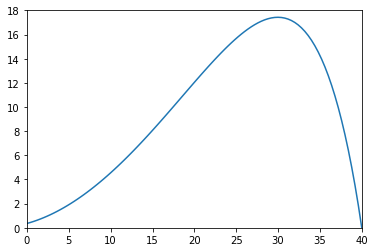

In [16]:
x = 0
t0 = 0
T = 40
num_int = 100
r = .04        # Interest rate
rho = .03      # Utility discount rate
gamma = -3     # Risk-aversion parameter

timeline = np.linspace(t0,T,num_int+1)
dt = (T - t0)/num_int

y = []
wealth = []

for t in timeline:
    z = p(t)
    y.append(z)
    x += (r*x + i(t) - c(t) - z)*dt

plt.plot(timeline, np.array(y)/1000)
plt.ylim(0,18)
plt.xlim(0,40)
plt.show()

# This is the code that really matters

In [172]:
def Optimal_Life_Insurance(x=0, t0=0, T=40, num_int=100, r=.04, rho=.03, gamma=-3):

    '''
    x = initial wealth
    t0 = starting time
    T = final time
    num_int = number of intervals for plotting
    
    r = interest rate
    rho = utility discount rate
    gamma = risk-aversion parameter
    
    '''
    
#     Initiate_Functions()
    
    def integral(a, t0, tf):
        return quad(a, t0, tf)[0]
    
    def i(t):
        # Income at time t
        return 50000*np.exp(.03*t)

    def lamb(t):
        # Hazard rate
        return 1/200 + 9*t/8000

    def eta(t):
        # Insurance premium-payout ratio
        return 1/200 + 9*t/8000

    def sum(t):
        # integral function doesn't play nice with sums of functions
        return r+eta(t)
    
    def H(v):
        return (lamb(v)+rho)/(1-gamma) - gamma/(1-gamma)*(r+eta(v))

    def K(s):
        return lamb(s)**(1/(1-gamma))/eta(s)**(gamma/(1-gamma))+1

    def a(t):
        return (np.exp(-integral(H, t, T)) + integral(lambda s: np.exp(-integral(H, t, s))*K(s), t, T))**(1-gamma)

    def b(t):
        return integral(lambda s: i(s)*np.exp(-integral(sum, t, s)), t, T)

    def c(t):
        return (x+b(t))/a(t)**(1/(1-gamma))

    def D(t):
        return (lamb(t)/eta(t))**(1/(1-gamma)) * 1/a(t)**(1/(1-gamma))

    def p(t):
        return eta(t)*((D(t)-1)*x + (lamb(t)/eta(t))**(1/(1-gamma))*b(t)/a(t)**(1/(1-gamma)))
    
    timeline = np.linspace(t0,T,num_int+1)
    dt = (T - t0)/num_int

    y = []
    wealth = []
    consumption = []

    for t in timeline:
        z = p(t)
        y.append(z)
        consumption.append(c(t))
        x += (r*x + i(t) - c(t) - z)*dt
        wealth.append(x)

    return (timeline, np.array(y)/1000, np.array(wealth)/100000, np.array(consumption)/10000)

In [122]:
solution = Optimal_Life_Insurance()

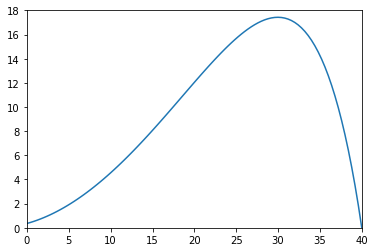

In [123]:
plt.plot(solution[0], solution[1])
plt.ylim(0,18)
plt.xlim(0,40)
plt.show()

# Reproduce Figure 1 on page 29
### Greater interest rate means wealth increases faster, and less need for insurance

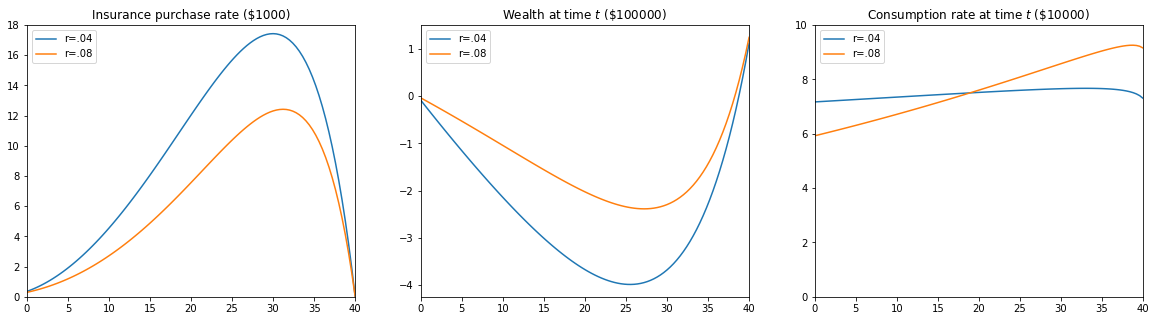

In [134]:
sol1 = Optimal_Life_Insurance(r=.08)

fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.set_xlim(0,40)
ax1.set_ylim(0,18)
ax1.plot(solution[0], solution[1], label='r=.04')
ax1.plot(sol1[0], sol1[1], label='r=.08')
ax1.legend()
ax1.set_title('Insurance purchase rate ($1000)')

ax2 = fig.add_subplot(132)
ax2.set_xlim(0,40)
ax2.plot(solution[0], solution[2], label='r=.04')
ax2.plot(sol1[0], sol1[2], label='r=.08')
ax2.legend()
ax2.set_title('Wealth at time $t$ (\$100000)')

ax3 = fig.add_subplot(133)
ax3.set_xlim(0,40)
ax3.set_ylim(0,10)
ax3.plot(solution[0], solution[3], label='r=.04')
ax3.plot(sol1[0], sol1[3], label='r=.08')
ax3.legend()
ax3.set_title('Consumption rate at time $t$ (\$10000)')

plt.show()

# Reproduce Figure 2 on page 29
### Greater rho means greater insurance purchase

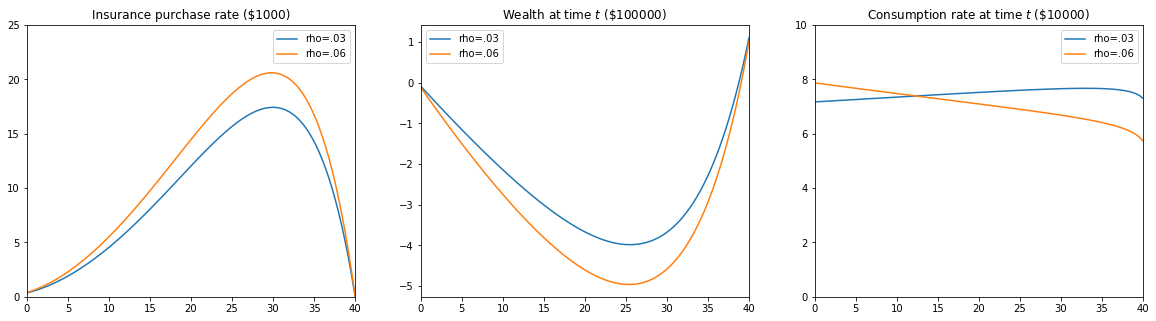

In [137]:
sol1 = Optimal_Life_Insurance(rho=.06)

fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.set_xlim(0,40)
ax1.set_ylim(0,25)
ax1.plot(solution[0], solution[1], label='rho=.03')
ax1.plot(sol1[0], sol1[1], label='rho=.06')
ax1.legend()
ax1.set_title('Insurance purchase rate ($1000)')

ax2 = fig.add_subplot(132)
ax2.set_xlim(0,40)
ax2.plot(solution[0], solution[2], label='rho=.03')
ax2.plot(sol1[0], sol1[2], label='rho=.06')
ax2.legend()
ax2.set_title('Wealth at time $t$ (\$100000)')

ax3 = fig.add_subplot(133)
ax3.set_xlim(0,40)
ax3.set_ylim(0,10)
ax3.plot(solution[0], solution[3], label='rho=.03')
ax3.plot(sol1[0], sol1[3], label='rho=.06')
ax3.legend()
ax3.set_title('Consumption rate at time $t$ (\$10000)')

plt.show()

# Reproduce Figure 3 on page 30
### more positive risk aversion means less insurance

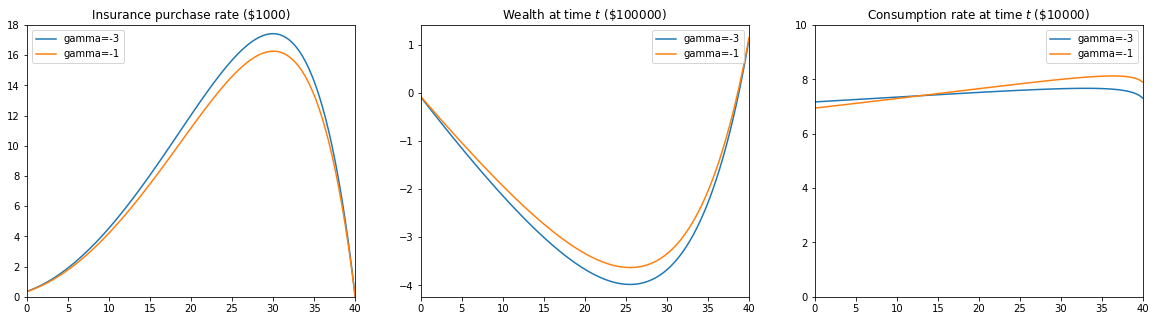

In [138]:
sol1 = Optimal_Life_Insurance(gamma=-1)

fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.set_xlim(0,40)
ax1.set_ylim(0,18)
ax1.plot(solution[0], solution[1], label='gamma=-3')
ax1.plot(sol1[0], sol1[1], label='gamma=-1')
ax1.legend()
ax1.set_title('Insurance purchase rate ($1000)')

ax2 = fig.add_subplot(132)
ax2.set_xlim(0,40)
ax2.plot(solution[0], solution[2], label='gamma=-3')
ax2.plot(sol1[0], sol1[2], label='gamma=-1')
ax2.legend()
ax2.set_title('Wealth at time $t$ (\$100000)')

ax3 = fig.add_subplot(133)
ax3.set_xlim(0,40)
ax3.set_ylim(0,10)
ax3.plot(solution[0], solution[3], label='gamma=-3')
ax3.plot(sol1[0], sol1[3], label='gamma=-1')
ax3.legend()
ax3.set_title('Consumption rate at time $t$ (\$10000)')

plt.show()

# Reproduce Figure 4 on page 30
### Increased hazard rate means more life insurance

In [144]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.set_xlim(0,40)
ax1.set_ylim(0,25)
ax1.plot(solution[0], solution[1], label='$\lambda(t)$=1/200+9t/8000')

ax2 = fig.add_subplot(132)
ax2.set_xlim(0,40)
ax2.plot(solution[0], solution[2], label='$\lambda(t)$=1/200+9t/8000')

ax3 = fig.add_subplot(133)
ax3.set_xlim(0,40)
ax3.set_ylim(0,10)
ax3.plot(solution[0], solution[3], label='$\lambda(t)$=1/200+9t/8000')

In [145]:
sol1 = Optimal_Life_Insurance()

ax1.plot(sol1[0], sol1[1], label='$\lambda(t)$=1/100+9t/4000')
ax1.legend()
ax1.set_title('Insurance purchase rate ($1000)')

ax2.plot(sol1[0], sol1[2], label='$\lambda(t)$=1/100+9t/4000')
ax2.legend()
ax2.set_title('Wealth at time $t$ (\$100000)')

ax3.plot(sol1[0], sol1[3], label='$\lambda(t)$=1/100+9t/4000')
ax3.legend()
ax3.set_title('Consumption rate at time $t$ (\$10000)')

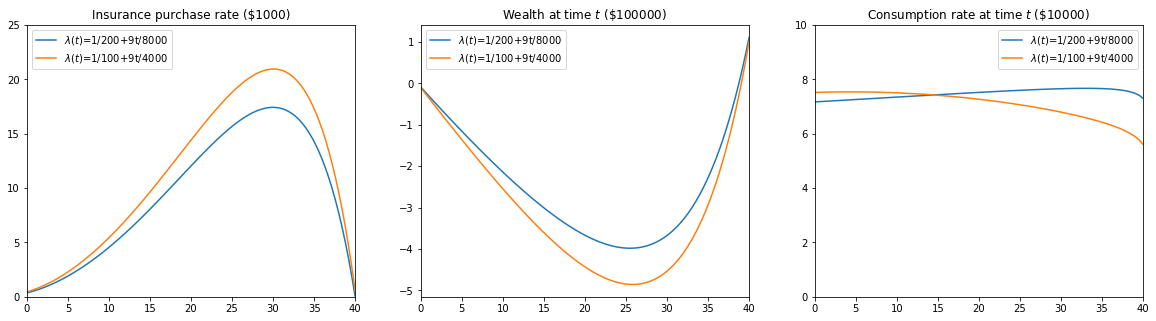

In [146]:
plt.show()

# Reproduce Figure 5 on page 31
### Triple eta, increase insurance

In [159]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.set_xlim(0,40)
ax1.set_ylim(0,25)
ax1.plot(solution[0], solution[1], label='$\eta(t)$=1/200+9t/8000')

ax2 = fig.add_subplot(132)
ax2.set_xlim(0,40)
ax2.plot(solution[0], solution[2], label='$\eta(t)$=1/200+9t/8000')

ax3 = fig.add_subplot(133)
ax3.set_xlim(0,40)
ax3.set_ylim(0,10)
ax3.plot(solution[0], solution[3], label='$\eta(t)$=1/200+9t/8000')

In [160]:
sol1 = Optimal_Life_Insurance()

ax1.plot(sol1[0], sol1[1], label='$\eta(t)$=3/200+27t/8000')
ax1.legend()
ax1.set_title('Insurance purchase rate ($1000)')

ax2.plot(sol1[0], sol1[2], label='$\eta(t)$=3/200+27t/8000')
ax2.legend()
ax2.set_title('Wealth at time $t$ (\$100000)')

ax3.plot(sol1[0], sol1[3], label='$\eta(t)$=3/200+27t/8000')
ax3.legend()
ax3.set_title('Consumption rate at time $t$ (\$10000)')

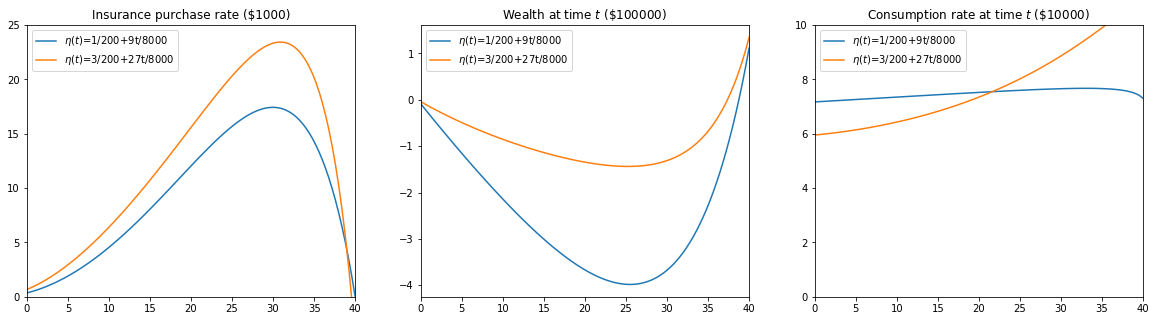

In [161]:
plt.show()

# Reproduce Figure 6 on page 31
### Multiply eta by 4, decrease insurance

In [155]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.set_xlim(0,40)
ax1.set_ylim(0,25)
ax1.plot(solution[0], solution[1], label='$\eta(t)$=1/200+9t/8000')

ax2 = fig.add_subplot(132)
ax2.set_xlim(0,40)
ax2.plot(solution[0], solution[2], label='$\eta(t)$=1/200+9t/8000')

ax3 = fig.add_subplot(133)
ax3.set_xlim(0,40)
ax3.set_ylim(0,10)
ax3.plot(solution[0], solution[3], label='$\eta(t)$=1/200+9t/8000')

In [156]:
sol1 = Optimal_Life_Insurance()

ax1.plot(sol1[0], sol1[1], label='$\eta(t)$=1/50+9t/2000')
ax1.legend()
ax1.set_title('Insurance purchase rate ($1000)')

ax2.plot(sol1[0], sol1[2], label='$\eta(t)$=1/50+9t/2000')
ax2.legend()
ax2.set_title('Wealth at time $t$ (\$100000)')

ax3.plot(sol1[0], sol1[3], label='$\eta(t)$=1/50+9t/2000')
ax3.legend()
ax3.set_title('Consumption rate at time $t$ (\$10000)')

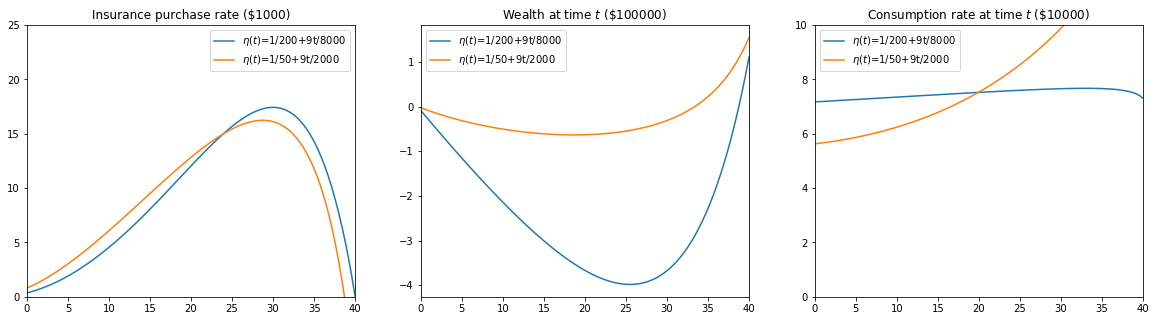

In [157]:
plt.show()

# What happens if wealth is increased?
### Insurance purchase goes down

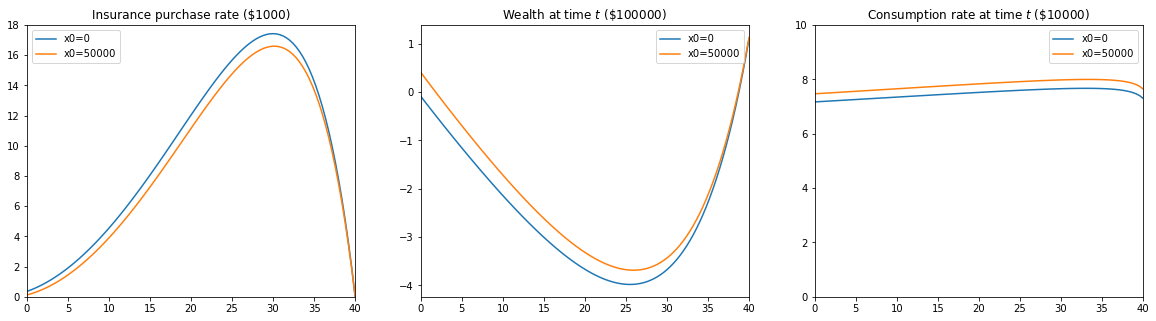

In [167]:
sol1 = Optimal_Life_Insurance(x=50000)

fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.set_xlim(0,40)
ax1.set_ylim(0,18)
ax1.plot(solution[0], solution[1], label='x0=0')
ax1.plot(sol1[0], sol1[1], label='x0=50000')
ax1.legend()
ax1.set_title('Insurance purchase rate ($1000)')

ax2 = fig.add_subplot(132)
ax2.set_xlim(0,40)
ax2.plot(solution[0], solution[2], label='x0=0')
ax2.plot(sol1[0], sol1[2], label='x0=50000')
ax2.legend()
ax2.set_title('Wealth at time $t$ (\$100000)')

ax3 = fig.add_subplot(133)
ax3.set_xlim(0,40)
ax3.set_ylim(0,10)
ax3.plot(solution[0], solution[3], label='x0=0')
ax3.plot(sol1[0], sol1[3], label='x0=50000')
ax3.legend()
ax3.set_title('Consumption rate at time $t$ (\$10000)')

plt.show()

# What happens if income increases?
### increase income rate, increase insurance purchase. More potential => more to cover

In [169]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.set_xlim(0,40)
ax1.set_ylim(0,35)
ax1.plot(solution[0], solution[1], label='$i(t)=50000e^{.03t}$')

ax2 = fig.add_subplot(132)
ax2.set_xlim(0,40)
ax2.plot(solution[0], solution[2], label='$i(t)=50000e^{.03t}$')

ax3 = fig.add_subplot(133)
ax3.set_xlim(0,40)
ax3.set_ylim(0,10)
ax3.plot(solution[0], solution[3], label='$i(t)=50000e^{.03t}$')

In [170]:
sol1 = Optimal_Life_Insurance()

ax1.plot(sol1[0], sol1[1], label='$i(t)=50000e^{.04t}$')
ax1.legend()
ax1.set_title('Insurance purchase rate ($1000)')

ax2.plot(sol1[0], sol1[2], label='$i(t)=50000e^{.04t}$')
ax2.legend()
ax2.set_title('Wealth at time $t$ (\$100000)')

ax3.plot(sol1[0], sol1[3], label='$i(t)=50000e^{.04t}$')
ax3.legend()
ax3.set_title('Consumption rate at time $t$ (\$10000)')

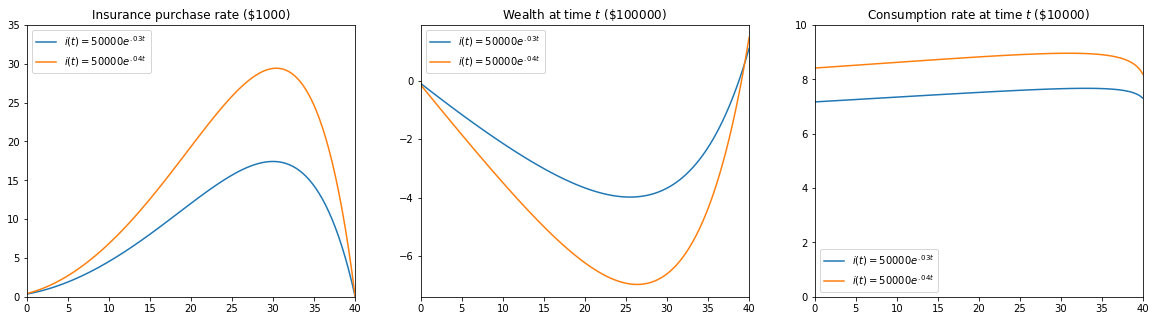

In [171]:
plt.show()